In [4]:
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import datasets, transforms

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import collections
from PIL import Image
import cv2
import os
import warnings
plt.style.use('bmh')
warnings.filterwarnings('ignore')

In [7]:
img_arr ="data_test.npy"
lab_arr="t_test.npy"

In [8]:
def file_read(X,fn):
  a,b=X.shape[0],X.shape[1]
  if b>a:
    X = np.load(fn)
  else:
    X = np.load(fn).T
  return X


In [9]:
X = np.load(img_arr)
X = file_read(X,img_arr)
T = np.load(lab_arr)

print(X.shape, T.shape)

(400, 90000) (400,)


In [10]:
img = []
for i in X:
    imag = np.reshape(i, (300, 300))
    imag = Image.fromarray(imag)
    imag = imag.resize((100, 100))
    imag = np.array(imag)
    img.append(imag)
img = np.array(img)

In [11]:
sh = X.shape[0]
X = img.reshape(sh, 100 * 100)

In [12]:
def Label_preprocessing(X,t_train):
  lst =np.where(t_train<0)[0]
  x,t=[],[]
  c=0
  for i in range(len(t_train)):
    if i in lst:
      x.append(X[i])
      t.append(int(10))
      c+=1
    else:
      x.append(X[i])
      t.append(t_train[i])
  print("Total number of labels which were reassigned with a new label due to label assignment of -1",c)
  return np.array(x),np.array(t)

In [13]:
X,T=Label_preprocessing(X,T)

Total number of labels which were reassigned with a new label due to label assignment of -1 20


In [14]:
def folder_structure(arr):
    ls1 = ['test']
    ls2 = ['x', 'sqaure root', 'plus sign', 'negative sign', 'equal', 'precent', 'partial', 'product', 'pi',
           'summation','others']
    fp1 = 'Data'
    fp2 = 'math_symbols'
    os.mkdir(fp1)
    if os.path.exists(fp1) == True:
        train_dir = os.path.join(fp1, fp2)
        os.mkdir(train_dir)
        for i in range(len(ls1)):
            train_dir = fp1 + '/' + fp2
            train_dir = os.path.join(train_dir, ls1[i])
            os.mkdir(train_dir)
            for j in range(len(arr)):
                train_dir = fp1 + '/' + fp2 + '/' + str(ls1[i])
                train_dir = os.path.join(train_dir, ls2[arr[j]])
                os.mkdir(train_dir)

In [15]:
def folder_structure_cond(T):
    pth = 'Data/math_symbols'
    if os.path.exists(pth) == True:
        print("Folder structure already present")
    else:
        arr=np.unique(T)
        folder_structure(arr)

In [16]:
def Image_Saver(X_train, y_train, ch):
    pth = 'Data/math_symbols'
    data_label_counts = collections.defaultdict(lambda : 0)
    for i in range(len(X_train)):
        ls2 = ['x', 'sqaure root', 'plus sign', 'negative sign', 'equal', 'precent', 'partial', 'product', 'pi',
               'summation','others']
        pth = 'Data/math_symbols/' + str(ch)
        tmp = np.array(X_train[i])
        img = np.reshape(tmp, (100, 100))
        label = ls2[int(y_train[i])]
        if y_train[i] == int(0):
            pth = pth + '/' + label + '/' + str(data_label_counts[label]) + '.jpg'
            cv2.imwrite(pth, img)
        elif y_train[i] == int(1):
            pth = pth + '/' + label + '/' + str(data_label_counts[label]) + '.jpg'
            cv2.imwrite(pth, img)
        elif y_train[i] == int(2):
            pth = pth + '/' + label + '/' + str(data_label_counts[label]) + '.jpg'
            cv2.imwrite(pth, img)
        elif y_train[i] == int(3):
            pth = pth + '/' + label + '/' + str(data_label_counts[label]) + '.jpg'
            cv2.imwrite(pth, img)
        elif y_train[i] == int(4):
            pth = pth + '/' + label + '/' + str(data_label_counts[label]) + '.jpg'
            cv2.imwrite(pth, img)
        elif y_train[i] == int(5):
            pth = pth + '/' + label + '/' + str(data_label_counts[label]) + '.jpg'
            cv2.imwrite(pth, img)
        elif y_train[i] == int(6):
            pth = pth + '/' + label + '/' + str(data_label_counts[label]) + '.jpg'
            cv2.imwrite(pth, img)
        elif y_train[i] == int(7):
            pth = pth + '/' + label + '/' + str(data_label_counts[label]) + '.jpg'
            cv2.imwrite(pth, img)
        elif y_train[i] == int(8):
            pth = pth + '/' + label + '/' + str(data_label_counts[label]) + '.jpg'
            cv2.imwrite(pth, img)
        elif y_train[i] == int(9):
            pth = pth + '/' + label + '/' + str(data_label_counts[label]) + '.jpg'
            cv2.imwrite(pth, img)
        elif y_train[i] == int(10):
            pth = pth + '/' + label + '/' + str(data_label_counts[label]) + '.jpg'
            cv2.imwrite(pth, img)

        data_label_counts[label] += 1

In [17]:
folder_structure_cond(T)

Folder structure already present


In [18]:
Image_Saver(X, T, ch='test')

In [19]:
data_transformer = transforms.Compose([
    transforms.ToTensor()
])

In [20]:
def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    plt.title(title)
    plt.show()

In [21]:
PATH = './PGB-ResNet-101.pth'
model = torch.load(PATH)

In [22]:
data_dir = 'Data/math_symbols'

image_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), data_transformer)

dataloader = torch.utils.data.DataLoader(image_dataset, batch_size=4, shuffle=True, num_workers=0)

dataset_sizes = len(image_dataset)
class_names = image_dataset.classes

print(class_names)

['equal', 'negative sign', 'others', 'partial', 'pi', 'plus sign', 'precent', 'product', 'sqaure root', 'summation', 'x']


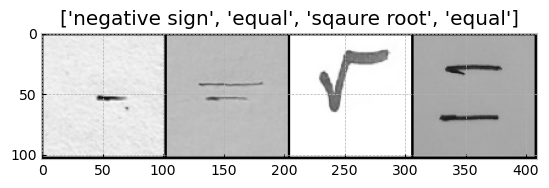

In [23]:
# Get a batch of training data
inputs, classes = next(iter(dataloader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [24]:
device = "cpu"
model =model.to("cpu")
avg = []

model.eval()  # Set model to evaluate mode
iter = 0
for inputs, labels in dataloader:
    inputs = inputs.to("cpu")
    labels = labels.to(device)
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)

    labels = labels.to(device)
    pred = predicted.to(device)
    labels = labels.numpy()
    pred = pred.numpy()
    acc = 100.0 * accuracy_score(labels, pred)
    avg.append(acc)
    print('Validation Accuracy of the network for iteration {0}: {1} %'.format(iter, acc))
    iter += 1
print("Average Validation Accuracy of the network", sum(avg) // iter)

Validation Accuracy of the network for iteration 0: 100.0 %
Validation Accuracy of the network for iteration 1: 100.0 %
Validation Accuracy of the network for iteration 2: 100.0 %
Validation Accuracy of the network for iteration 3: 100.0 %
Validation Accuracy of the network for iteration 4: 100.0 %
Validation Accuracy of the network for iteration 5: 100.0 %
Validation Accuracy of the network for iteration 6: 100.0 %
Validation Accuracy of the network for iteration 7: 100.0 %
Validation Accuracy of the network for iteration 8: 100.0 %
Validation Accuracy of the network for iteration 9: 100.0 %
Validation Accuracy of the network for iteration 10: 100.0 %
Validation Accuracy of the network for iteration 11: 100.0 %
Validation Accuracy of the network for iteration 12: 100.0 %
Validation Accuracy of the network for iteration 13: 100.0 %
Validation Accuracy of the network for iteration 14: 100.0 %
Validation Accuracy of the network for iteration 15: 100.0 %
Validation Accuracy of the network